In [1]:
import numpy as np
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


# 訓練データの読み込み

In [2]:
class TrainDataset():
    def __init__(self):
        super().__init__()
        
        # CSVファイル読み込み（訓練データ）
        df = pd.read_csv('train.csv')
        
        # 不正データの補正 (レコード削除のパターンもあるため、ファイル読み込み直後に処理する)
        df = self.correction(df)
        
        # 説明変数と目的変数に分割する
        df_x = df.drop(['loan_status'], axis=1)
        self.df_y = df.loc[:,['loan_status']]
        self.targetConv()
        
        # 説明変数の量的データ、質的データ分割
        self.x_cate , self.x_cont = self.DataChange(df_x.copy())
        self.x_desc = self.x_cont.describe()
        
        # データの加工（標準化や対数化など）
        #self.std_scale = 0
        #self.max_scale = 0
        #self.dobule_scale = 0
        #self.polynomialFlg = 0
        #self.binSplitFlg = 0
        self.logFlg = 0
        self.DataConv()
        
        #self.NpToPy()
        #self.num = len(self.X_train)
        self.num = len(self.x_cont)
        self.coti_size = self.x_cont.shape[1]
        
        
    
    def correction(self, df):
        
        print('null check')
        print(df.isnull().sum())
        print('-------------------------')
        
        return df
    
    def viewDescribe(self):
        self.x_cont.describe()
        self.x_cate.describe(include='O')
    
    def dropCol(self):
        self.x_cate_conv = self.x_cate.copy()
        self.x_cate_conv.drop(columns=['employment_length'], axis=1)
        # application_typeは使ってみる
        
        self.x_cont_conv = self.x_cont.copy()
        self.x_cont_conv.drop(columns=['loan_amnt'], axis=1)
        # credit_scoreは使ってみる（差があるかは要確認）
        
    def DataChange(self, df_x):
        categ_cols = ['term' ,'grade' ,'employment_length', 'purpose' ,'application_type']
        contin_cols = ['loan_amnt', 'interest_rate', 'credit_score']

        ####################################
        ##  データ分割
        ##  説明変数と目的変数に分ける。
        ##  説明変数はカテゴリデータと連続データに分ける。
        ####################################
        x_cate = df_x[categ_cols].copy()
        x_cont = df_x[contin_cols].copy()
        
        return x_cate , x_cont
    
    def targetConv(self):
        self.df_y = self.df_y.replace('FullyPaid', '0').replace('ChargedOff', '1')
        self.df_y.astype('float32')
        
    def NpToPy(self):
        
        #tmp = self.x_cont[['displacement_log', 'horsepower_log', 'weight_log', 'acceleration_log']]
        #tmp = self.x_cont[['horsepower_log', 'weight_log', 'acceleration_log']]
        
        x_temp = pd.concat([self.x_cate_conv , self.x_cont_conv] , axis=1)
        #x_temp = self.x_cont.copy()
        x_temp = np.array(x_temp)
        y_temp = np.array(self.df_y)
        
        # 訓練データと検証データに分割
        x_train,x_test,y_train,y_test=train_test_split(x_temp, y_temp, test_size=0.2, random_state=3) 
        
        # 
        self.X_train = x_train
        self.Y_train = y_train
        self.X_test = x_test
        self.Y_test = y_test
        
        self.coti_size = self.x_cont.shape[1]
        self.in_size  = self.X_train.shape[1]
        self.out_size = self.Y_train.shape[1]  
        
    def DataConv(self):
        
        
        self.dropCol()
        self.NpToPy()
        

In [3]:
train_dataset = TrainDataset()

null check
id                   0
loan_amnt            0
term                 0
interest_rate        0
grade                0
employment_length    0
purpose              0
credit_score         0
application_type     0
loan_status          0
dtype: int64
-------------------------


In [4]:
class TestDataset(TrainDataset):
    def __init__(self, x_desc):
        
        # CSVファイル読み込み（訓練データ）
        df = pd.read_csv('test.csv' )
        
        # 不正データの補正 (レコード削除のパターンもあるため、ファイル読み込み直後に処理する)
        df = self.correction(df)
        
        # 目的変数の格納
        self.x_cate , self.x_cont = self.DataChange(df.copy())
        self.x_desc = x_desc
        
        # データの加工（標準化や対数化など）
        #self.std_scale = 0
        #self.max_scale = 0
        #self.dobule_scale = 0
        #self.polynomialFlg = 0
        #self.binSplitFlg = 0
        self.logFlg  = 0
        self.DataConv()
        
        #self.NpToPy()
        #self.num = len(self.x_cate)
        self.num = len(self.x_cont)
        self.coti_size = self.x_cont.shape[1]

    def __getitem__(self, index):
        return self.X_test[index]
    
    def __len__(self):
        return self.num
    
    def NpToPy(self):
        
        x_temp = pd.concat([self.x_cate , self.x_cont] , axis=1)
        
        #x_temp = self.x_cont.copy()
        x_temp = np.array(x_temp)
        
        # numpy の値を torch の値に変換する
        self.X_vat = x_temp



In [5]:
test_dataset = TestDataset(train_dataset.x_desc)

null check
id                   0
loan_amnt            0
term                 0
interest_rate        0
grade                0
employment_length    0
purpose              0
credit_score         0
application_type     0
dtype: int64
-------------------------


# 訓練データのデータ表示

## 説明変数

In [6]:
# グレード
train_dataset.x_cate['grade'].value_counts()

C4    18936
B4    18409
C1    16767
B2    16357
B3    16058
B1    15484
B5    15163
C2    13917
C5    11420
A5    10785
D1    10464
C3    10266
D4     9828
A4     9441
D2     8823
D3     8387
D5     6866
A3     6532
A1     5764
A2     5749
E2     2835
E4     2301
E1      640
E5      535
E3      416
F5        4
F3        3
Name: grade, dtype: int64

# データの可視化

In [7]:
# 返済済
n_x_cont = train_dataset.x_cont.loc[train_dataset.df_y.index[train_dataset.df_y['loan_status']=='0'],:].copy()
# 貸し倒れ
d_x_cont = train_dataset.x_cont.loc[train_dataset.df_y.index[train_dataset.df_y['loan_status']=='1'],:].copy()

# 返済済
n_x_cate = train_dataset.x_cate.loc[train_dataset.df_y.index[train_dataset.df_y['loan_status']=='0'],:].copy()
# 貸し倒れ
d_x_cate = train_dataset.x_cate.loc[train_dataset.df_y.index[train_dataset.df_y['loan_status']=='1'],:].copy()


df_cate = pd.concat([train_dataset.x_cate, train_dataset.df_y] , axis=1)

df_cont = pd.concat([train_dataset.x_cont, train_dataset.df_y] , axis=1)

## カテゴリデータ

In [8]:
train_dataset.x_cate.describe(include='O')

,term,grade,employment_length,purpose,application_type
count,242150,242150,242150,242150,242150
unique,2,27,11,9,2
top,3 years,C4,10 years,debt_consolidation,Individual
freq,189887,18936,103339,160207,240368


In [9]:
col='purpose'
label=list(train_dataset.x_cate[col].value_counts().index)
label=np.sort(label)
print(label)

['car' 'credit_card' 'debt_consolidation' 'home_improvement' 'house'
 'major_purchase' 'medical' 'other' 'small_business']


In [10]:
train_dataset.x_cate.describe(include='O').loc['count', col]

242150

In [11]:
col = 'purpose'

#values = ['car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house', 'major_purchase', 'medical', 'other', 'small_business']

## 全件
#tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[train_dataset.x_cate[col].isin(values)],col].copy()
## 返済済
#tmp_n_x = n_x_cate.loc[n_x_cate.index[n_x_cate[col].isin(values)],col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[d_x_cate.index[d_x_cate[col].isin(values)],col].copy()



# 全件
tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)


print(tmp)

all		 242150
FullyPaid	 199794
ChargedOff	 42356
FullyPaid_per	 0.8251
ChargedOff_per	 0.1749
----------------
                       all  FullyPaid  ChargedOff  FullyPaid_per  \
debt_consolidation  160207     130284     29923.0         0.8132   
credit_card          48900      41995      6905.0         0.8588   
other                17633      14633      3000.0         0.8299   
home_improvement      7686       6714       972.0         0.8735   
car                   3855       3369       486.0         0.8739   
medical               3154       2297       857.0         0.7283   
small_business         449        363        86.0         0.8085   
major_purchase         262        135       127.0         0.5153   
house                    4          4         0.0         1.0000   

                    ChargedOff_per  
debt_consolidation          0.1868  
credit_card                 0.1412  
other                       0.1701  
home_improvement            0.1265  
car                    

In [12]:
col = 'grade'

# 全件
tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'
all_cnt = all_cnt


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 242150
FullyPaid	 199794
ChargedOff	 42356
FullyPaid_per	 0.8251
ChargedOff_per	 0.1749
----------------
      all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A1   5764     5624.0         140         0.9757          0.0243
A2   5749     5430.0         319         0.9445          0.0555
A3   6532     4821.0        1711         0.7381          0.2619
A4   9441     8921.0         520         0.9449          0.0551
A5  10785    10387.0         398         0.9631          0.0369
B1  15484    13747.0        1737         0.8878          0.1122
B2  16357    13669.0        2688         0.8357          0.1643
B3  16058    14469.0        1589         0.9010          0.0990
B4  18409    16154.0        2255         0.8775          0.1225
B5  15163    12213.0        2950         0.8054          0.1946
C1  16767    14174.0        2593         0.8454          0.1546
C2  13917    11643.0        2274         0.8366          0.1634
C3  10266     8202.0        2064         0.7989          

In [13]:
col = 'application_type'

# 全件
tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'
all_cnt = all_cnt


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 242150
FullyPaid	 199794
ChargedOff	 42356
FullyPaid_per	 0.8251
ChargedOff_per	 0.1749
----------------
               all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
Individual  240368     198284       42084         0.8249          0.1751
Joint App     1782       1510         272         0.8474          0.1526


In [14]:
col = 'term'

# 全件
tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'
all_cnt = all_cnt


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 242150
FullyPaid	 199794
ChargedOff	 42356
FullyPaid_per	 0.8251
ChargedOff_per	 0.1749
----------------
            all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
3 years  189887     162993       26894         0.8584          0.1416
5 years   52263      36801       15462         0.7042          0.2958


In [62]:
col = 'employment_length'

# 全件
tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'
all_cnt = all_cnt


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 242150
FullyPaid	 199794
ChargedOff	 42356
FullyPaid_per	 0.8251
ChargedOff_per	 0.1749
----------------
             all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
0 years    19373      15378        3995         0.7938          0.2062
1 year     15141      12761        2380         0.8428          0.1572
10 years  103339      84279       19060         0.8156          0.1844
2 years    15783      12720        3063         0.8059          0.1941
3 years    11295       9357        1938         0.8284          0.1716
4 years    13418      11920        1498         0.8884          0.1116
5 years    12812      10765        2047         0.8402          0.1598
6 years    14815      12580        2235         0.8491          0.1509
7 years    12673      10895        1778         0.8597          0.1403
8 years     5127       4183         944         0.8159          0.1841
9 years    18374      14956        3418         0.8140          0.1860


In [63]:
col = 'grade'

values = ['4 years']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[train_dataset.x_cate['employment_length'].isin(values)],col].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[n_x_cate['employment_length'].isin(values)],col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[d_x_cate['employment_length'].isin(values)],col].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 13418
FullyPaid	 11920
ChargedOff	 1498
FullyPaid_per	 0.8884
ChargedOff_per	 0.1116
----------------
     all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A1   411        401          10         0.9757          0.0243
A2   556        547           9         0.9838          0.0162
A3   389        329          60         0.8458          0.1542
A4   461        451          10         0.9783          0.0217
A5   478        470           8         0.9833          0.0167
B1   945        844         101         0.8931          0.1069
B2   760        667          93         0.8776          0.1224
B3  1001        938          63         0.9371          0.0629
B4   970        896          74         0.9237          0.0763
B5   750        652          98         0.8693          0.1307
C1  1395       1255         140         0.8996          0.1004
C2   591        533          58         0.9019          0.0981
C3   593        513          80         0.8651          0.1349
C4   633  

In [16]:
col = 'grade'

values = ['credit_card']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[train_dataset.x_cate['purpose'].isin(values)],col].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[n_x_cate['purpose'].isin(values)],col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[d_x_cate['purpose'].isin(values)],col].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 48900
FullyPaid	 41995
ChargedOff	 6905
FullyPaid_per	 0.8588
ChargedOff_per	 0.1412
----------------
     all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A1  1495     1452.0          43         0.9712          0.0288
A2  1648     1607.0          41         0.9751          0.0249
A3   923      774.0         149         0.8386          0.1614
A4  2719     2582.0         137         0.9496          0.0504
A5  2436     2355.0          81         0.9667          0.0333
B1  4052     3658.0         394         0.9028          0.0972
B2  3417     2949.0         468         0.8630          0.1370
B3  4085     3696.0         389         0.9048          0.0952
B4  3654     3261.0         393         0.8924          0.1076
B5  3482     2842.0         640         0.8162          0.1838
C1  3217     2754.0         463         0.8561          0.1439
C2  2747     2361.0         386         0.8595          0.1405
C3  1889     1549.0         340         0.8200          0.1800
C4  3216  

In [17]:
col = 'grade'

values = ['debt_consolidation']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[train_dataset.x_cate['purpose'].isin(values)],col].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[n_x_cate['purpose'].isin(values)],col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[d_x_cate['purpose'].isin(values)],col].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 160207
FullyPaid	 130284
ChargedOff	 29923
FullyPaid_per	 0.8132
ChargedOff_per	 0.1868
----------------
      all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A1   3240     3169.0          71         0.9781          0.0219
A2   3370     3115.0         255         0.9243          0.0757
A3   4733     3375.0        1358         0.7131          0.2869
A4   5347     5037.0         310         0.9420          0.0580
A5   6981     6721.0         260         0.9628          0.0372
B1   9529     8347.0        1182         0.8760          0.1240
B2  10625     8907.0        1718         0.8383          0.1617
B3   9875     8840.0        1035         0.8952          0.1048
B4  12011    10437.0        1574         0.8690          0.1310
B5   9693     7730.0        1963         0.7975          0.2025
C1  11441     9605.0        1836         0.8395          0.1605
C2   9512     7897.0        1615         0.8302          0.1698
C3   7341     5806.0        1535         0.7909          

In [50]:
col = 'grade'

values = ['credit_card']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[(train_dataset.x_cate['purpose'].isin(values)) & (train_dataset.x_cate['application_type'].isin(['Joint App']))  ],:].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[ (n_x_cate['purpose'].isin(values)) & (n_x_cate['application_type'].isin(['Joint App']))    ],:].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[ (d_x_cate['purpose'].isin(values)) & (d_x_cate['application_type'].isin(['Joint App']))    ],:].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all[col].value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x[col].value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x[col].value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 475
FullyPaid	 417
ChargedOff	 58
FullyPaid_per	 0.8779
ChargedOff_per	 0.1221
----------------
    all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A1   13         12         1.0         0.9231          0.0769
A2   14         13         1.0         0.9286          0.0714
A3    4          2         2.0         0.5000          0.5000
A4   22         20         2.0         0.9091          0.0909
A5   10          9         1.0         0.9000          0.1000
B1   29         26         3.0         0.8966          0.1034
B2   51         43         8.0         0.8431          0.1569
B3   38         37         1.0         0.9737          0.0263
B4   24         22         2.0         0.9167          0.0833
B5   20         16         4.0         0.8000          0.2000
C1   36         33         3.0         0.9167          0.0833
C2   20         19         1.0         0.9500          0.0500
C3   19         14         5.0         0.7368          0.2632
C4   32         28         4.0

In [60]:
col = 'grade'

values = ['debt_consolidation']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[(train_dataset.x_cate['purpose'].isin(values)) & (train_dataset.x_cate['application_type'].isin(['Individual']))  ],:].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[ (n_x_cate['purpose'].isin(values)) & (n_x_cate['application_type'].isin(['Individual']))    ],:].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[ (d_x_cate['purpose'].isin(values)) & (d_x_cate['application_type'].isin(['Individual']))    ],:].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all[col].value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x[col].value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x[col].value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 159115
FullyPaid	 129372
ChargedOff	 29743
FullyPaid_per	 0.8131
ChargedOff_per	 0.1869
----------------
      all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A1   3200     3137.0          63         0.9803          0.0197
A2   3347     3096.0         251         0.9250          0.0750
A3   4691     3342.0        1349         0.7124          0.2876
A4   5305     5000.0         305         0.9425          0.0575
A5   6958     6700.0         258         0.9629          0.0371
B1   9490     8311.0        1179         0.8758          0.1242
B2  10517     8817.0        1700         0.8384          0.1616
B3   9777     8755.0        1022         0.8955          0.1045
B4  11949    10381.0        1568         0.8688          0.1312
B5   9654     7697.0        1957         0.7973          0.2027
C1  11354     9525.0        1829         0.8389          0.1611
C2   9491     7879.0        1612         0.8302          0.1698
C3   7298     5768.0        1530         0.7904          

In [61]:
col = 'grade'

values = ['debt_consolidation']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[(train_dataset.x_cate['purpose'].isin(values)) & (train_dataset.x_cate['employment_length'].isin(['4 years'])) & (train_dataset.x_cate['application_type'].isin(['Individual']))  ],:].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[ (n_x_cate['purpose'].isin(values))  & (n_x_cate['employment_length'].isin(['4 years'])) & (n_x_cate['application_type'].isin(['Individual']))    ],:].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[ (d_x_cate['purpose'].isin(values))  & (d_x_cate['employment_length'].isin(['4 years'])) & (d_x_cate['application_type'].isin(['Individual']))    ],:].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all[col].value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x[col].value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x[col].value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 9243
FullyPaid	 8127
ChargedOff	 1116
FullyPaid_per	 0.8793
ChargedOff_per	 0.1207
----------------
     all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A1   246        240           6         0.9756          0.0244
A2   337        331           6         0.9822          0.0178
A3   279        230          49         0.8244          0.1756
A4   288        282           6         0.9792          0.0208
A5   330        329           1         0.9970          0.0030
B1   612        538          74         0.8791          0.1209
B2   510        445          65         0.8725          0.1275
B3   658        621          37         0.9438          0.0562
B4   639        586          53         0.9171          0.0829
B5   525        450          75         0.8571          0.1429
C1  1026        912         114         0.8889          0.1111
C2   423        383          40         0.9054          0.0946
C3   455        392          63         0.8615          0.1385
C4   449    

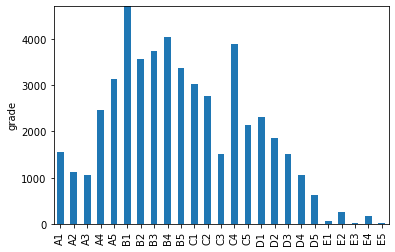

In [32]:
ymax = tmp_all['grade'].value_counts().max()

#  全レコード
value = tmp_all['grade'].value_counts()
#plt.bar([train_dataset.x_cate.loc[:, col]], tick_label=label)
value = value.sort_index()
value.plot.bar()
plt.ylim(0 ,ymax)
plt.ylabel('grade')
plt.show()

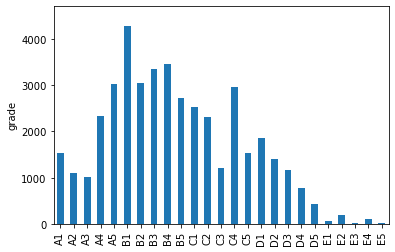

In [33]:
#  全レコード
value = tmp_n_x['grade'].value_counts()
#plt.bar([train_dataset.x_cate.loc[:, col]], tick_label=label)
value = value.sort_index()
value.plot.bar()
plt.ylim(0 ,ymax)
plt.ylabel('grade')
plt.show()

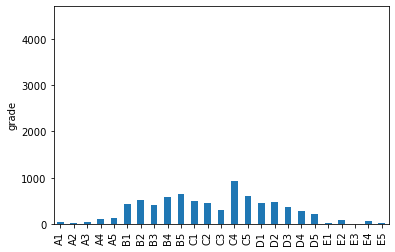

In [34]:
#  全レコード
value = tmp_d_x['grade'].value_counts()
#plt.bar([train_dataset.x_cate.loc[:, col]], tick_label=label)
value = value.sort_index()
value.plot.bar()
plt.ylim(0 ,ymax)
plt.ylabel('grade')
plt.show()

In [35]:
col = 'grade'

values = ['credit_card']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[(train_dataset.x_cate['purpose'].isin(values)) & (train_dataset.x_cate['term'].isin(['3 years'])) & (train_dataset.x_cate['employment_length'].isin(['10 years']))  ],:].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[ (n_x_cate['purpose'].isin(values))  & (n_x_cate['term'].isin(['3 years'])) & (n_x_cate['employment_length'].isin(['10 years']))    ],:].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[ (d_x_cate['purpose'].isin(values))  & (d_x_cate['term'].isin(['3 years'])) & (d_x_cate['employment_length'].isin(['10 years']))    ],:].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all[col].value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x[col].value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x[col].value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 16973
FullyPaid	 15001
ChargedOff	 1972
FullyPaid_per	 0.8838
ChargedOff_per	 0.1162
----------------
     all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A1   675      659.0        16.0         0.9763          0.0237
A2   628      619.0         9.0         0.9857          0.0143
A3   223      215.0         8.0         0.9641          0.0359
A4  1306     1260.0        46.0         0.9648          0.0352
A5  1198     1161.0        37.0         0.9691          0.0309
B1  2074     1924.0       150.0         0.9277          0.0723
B2  1229     1076.0       153.0         0.8755          0.1245
B3  1661     1499.0       162.0         0.9025          0.0975
B4  1256     1110.0       146.0         0.8838          0.1162
B5  1268     1015.0       253.0         0.8005          0.1995
C1   898      751.0       147.0         0.8363          0.1637
C2   833      732.0       101.0         0.8788          0.1212
C3   460      386.0        74.0         0.8391          0.1609
C4   990  

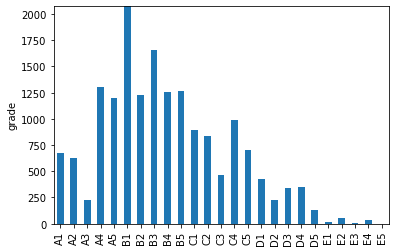

In [36]:
ymax = tmp_all['grade'].value_counts().max()

#  全レコード
value = tmp_all['grade'].value_counts()
#plt.bar([train_dataset.x_cate.loc[:, col]], tick_label=label)
value = value.sort_index()
value.plot.bar()
plt.ylim(0 ,ymax)
plt.ylabel('grade')
plt.show()

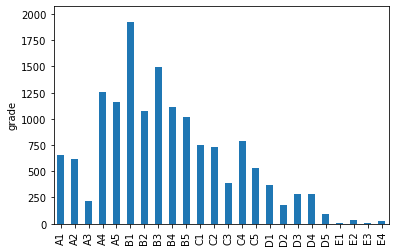

In [37]:
#  全レコード
value = tmp_n_x['grade'].value_counts()
#plt.bar([train_dataset.x_cate.loc[:, col]], tick_label=label)
value = value.sort_index()
value.plot.bar()
plt.ylim(0 ,ymax)
plt.ylabel('grade')
plt.show()

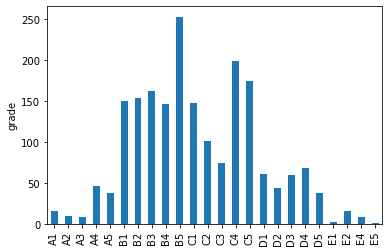

In [39]:
#  全レコード
value = tmp_d_x['grade'].value_counts()
#plt.bar([train_dataset.x_cate.loc[:, col]], tick_label=label)
value = value.sort_index()
value.plot.bar()
#plt.ylim(0 ,ymax)
plt.ylabel('grade')
plt.show()

In [45]:
col = 'grade'

values = ['car']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[(train_dataset.x_cate['purpose'].isin(values)) & (train_dataset.x_cate['term'].isin(['5 years']))   ],:].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[ (n_x_cate['purpose'].isin(values))  & (n_x_cate['term'].isin(['5 years'])) ],:].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[ (d_x_cate['purpose'].isin(values))  & (d_x_cate['term'].isin(['5 years'])) ],:].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all[col].value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x[col].value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x[col].value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 169
FullyPaid	 132
ChargedOff	 37
FullyPaid_per	 0.7811
ChargedOff_per	 0.2189
----------------
    all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A2    2          2         0.0         1.0000          0.0000
A3    4          3         1.0         0.7500          0.2500
A4    1          1         0.0         1.0000          0.0000
A5    1          1         0.0         1.0000          0.0000
B1    5          2         3.0         0.4000          0.6000
B2    9          6         3.0         0.6667          0.3333
B3    5          5         0.0         1.0000          0.0000
B4    4          4         0.0         1.0000          0.0000
B5    2          1         1.0         0.5000          0.5000
C1    8          6         2.0         0.7500          0.2500
C2    5          5         0.0         1.0000          0.0000
C3   17         14         3.0         0.8235          0.1765
C4   11          9         2.0         0.8182          0.1818
C5   10          7         3.0

In [42]:
col = 'grade'

values = ['car']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[(train_dataset.x_cate['purpose'].isin(values)) & (train_dataset.x_cate['term'].isin(['3 years']))  ],:].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[ (n_x_cate['purpose'].isin(values))  & (n_x_cate['term'].isin(['3 years']))    ],:].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[ (d_x_cate['purpose'].isin(values))  & (d_x_cate['term'].isin(['3 years']))   ],:].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all[col].value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x[col].value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x[col].value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 3686
FullyPaid	 3237
ChargedOff	 449
FullyPaid_per	 0.8782
ChargedOff_per	 0.1218
----------------
    all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A1   36         34         2.0         0.9444          0.0556
A2   39         38         1.0         0.9744          0.0256
A3   21         21         0.0         1.0000          0.0000
A4  100         95         5.0         0.9500          0.0500
A5  177        169         8.0         0.9548          0.0452
B1  223        202        21.0         0.9058          0.0942
B2  323        287        36.0         0.8885          0.1115
B3  269        253        16.0         0.9405          0.0595
B4  362        334        28.0         0.9227          0.0773
B5  161        142        19.0         0.8820          0.1180
C1  385        338        47.0         0.8779          0.1221
C2  188        151        37.0         0.8032          0.1968
C3  104         89        15.0         0.8558          0.1442
C4  204        162        4

In [43]:
col = 'grade'

values = ['car']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[(train_dataset.x_cate['purpose'].isin(values))  & (train_dataset.x_cate['employment_length'].isin(['10 years']))  ],:].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[ (n_x_cate['purpose'].isin(values))  & (n_x_cate['employment_length'].isin(['10 years']))    ],:].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[ (d_x_cate['purpose'].isin(values))  & (d_x_cate['employment_length'].isin(['10 years']))    ],:].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all[col].value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x[col].value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x[col].value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 1235
FullyPaid	 1066
ChargedOff	 169
FullyPaid_per	 0.8632
ChargedOff_per	 0.1368
----------------
    all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
A1   13         11         2.0         0.8462          0.1538
A2   10         10         0.0         1.0000          0.0000
A3    9          8         1.0         0.8889          0.1111
A4   36         34         2.0         0.9444          0.0556
A5   63         62         1.0         0.9841          0.0159
B1  126        115        11.0         0.9127          0.0873
B2   87         76        11.0         0.8736          0.1264
B3   83         78         5.0         0.9398          0.0602
B4   93         83        10.0         0.8925          0.1075
B5   39         31         8.0         0.7949          0.2051
C1   99         87        12.0         0.8788          0.1212
C2   67         49        18.0         0.7313          0.2687
C3   36         29         7.0         0.8056          0.1944
C4   67         55        1

In [116]:
col = 'purpose'

values = ['A3']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[train_dataset.x_cate['grade'].isin(values)],col].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[n_x_cate['grade'].isin(values)],col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[d_x_cate['grade'].isin(values)],col].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 6532
FullyPaid	 4821
ChargedOff	 1711
FullyPaid_per	 0.7381
ChargedOff_per	 0.2619
----------------
                     all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
car                   25         24         1.0         0.9600          0.0400
credit_card          923        774       149.0         0.8386          0.1614
debt_consolidation  4733       3375      1358.0         0.7131          0.2869
home_improvement     310        277        33.0         0.8935          0.1065
major_purchase        19          1        18.0         0.0526          0.9474
medical               64         31        33.0         0.4844          0.5156
other                454        335       119.0         0.7379          0.2621
small_business         4          4         0.0         1.0000          0.0000


In [47]:
col = 'purpose'

values = ['B4']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[train_dataset.x_cate['grade'].isin(values)],col].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[n_x_cate['grade'].isin(values)],col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[d_x_cate['grade'].isin(values)],col].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 18409
FullyPaid	 16154
ChargedOff	 2255
FullyPaid_per	 0.8775
ChargedOff_per	 0.1225
----------------
                      all  FullyPaid  ChargedOff  FullyPaid_per  \
car                   366        338        28.0         0.9235   
credit_card          3654       3261       393.0         0.8924   
debt_consolidation  12011      10437      1574.0         0.8690   
home_improvement      615        559        56.0         0.9089   
major_purchase          2          2         0.0         1.0000   
medical               197        166        31.0         0.8426   
other                1560       1387       173.0         0.8891   
small_business          4          4         0.0         1.0000   

                    ChargedOff_per  
car                         0.0765  
credit_card                 0.1076  
debt_consolidation          0.1310  
home_improvement            0.0911  
major_purchase              0.0000  
medical                     0.1574  
other                       0

In [119]:
col = 'employment_length'

values = ['C4']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[train_dataset.x_cate['grade'].isin(values)],col].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[n_x_cate['grade'].isin(values)],col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[d_x_cate['grade'].isin(values)],col].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 18936
FullyPaid	 14448
ChargedOff	 4488
FullyPaid_per	 0.763
ChargedOff_per	 0.237
----------------
           all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
0 years   1483       1082         401         0.7296          0.2704
1 year    1056        802         254         0.7595          0.2405
10 years  7943       6048        1895         0.7614          0.2386
2 years   1098        824         274         0.7505          0.2495
3 years    752        572         180         0.7606          0.2394
4 years    633        528         105         0.8341          0.1659
5 years   1132        840         292         0.7420          0.2580
6 years   1235        979         256         0.7927          0.2073
7 years   1439       1144         295         0.7950          0.2050
8 years    332        262          70         0.7892          0.2108
9 years   1833       1367         466         0.7458          0.2542


In [128]:
col = 'purpose'

values = ['3 years']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[train_dataset.x_cate['term'].isin(values)],col].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[n_x_cate['term'].isin(values)],col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[d_x_cate['term'].isin(values)],col].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 189887
FullyPaid	 162993
ChargedOff	 26894
FullyPaid_per	 0.8584
ChargedOff_per	 0.1416
----------------
                       all  FullyPaid  ChargedOff  FullyPaid_per  \
car                   3686       3237       449.0         0.8782   
credit_card          39234      34603      4631.0         0.8820   
debt_consolidation  122633     104360     18273.0         0.8510   
home_improvement      6294       5633       661.0         0.8950   
house                    4          4         0.0         1.0000   
major_purchase         129         79        50.0         0.6124   
medical               2526       1936       590.0         0.7664   
other                15098      12906      2192.0         0.8548   
small_business         283        235        48.0         0.8304   

                    ChargedOff_per  
car                         0.1218  
credit_card                 0.1180  
debt_consolidation          0.1490  
home_improvement            0.1050  
house                  

In [127]:
col = 'term'

values = ['debt_consolidation']

## 全件
tmp_all = train_dataset.x_cate.loc[train_dataset.x_cate.index[train_dataset.x_cate['purpose'].isin(values)],col].copy()
## 返済済
tmp_n_x = n_x_cate.loc[n_x_cate.index[n_x_cate['purpose'].isin(values)],col].copy()
# 貸し倒れ
tmp_d_x = d_x_cate.loc[d_x_cate.index[d_x_cate['purpose'].isin(values)],col].copy()



# 全件
#tmp_all = train_dataset.x_cate.loc[:,col].copy()
# 返済済
#tmp_n_x = n_x_cate.loc[:,col].copy()
# 貸し倒れ
#tmp_d_x = d_x_cate.loc[:,col].copy()

print('all\t\t' , len(tmp_all) )
print('FullyPaid\t' , len(tmp_n_x) )
print('ChargedOff\t' , len(tmp_d_x) )
print('FullyPaid_per\t' , round(len(tmp_n_x) / len(tmp_all), 4) )
print('ChargedOff_per\t' , round(len(tmp_d_x)  / len(tmp_all), 4) )

print('----------------')

#  全レコード
all_cnt = tmp_all.value_counts()
all_cnt.name = 'all'


# 返済済
n_cnt = tmp_n_x.value_counts() 
n_cnt.name = 'FullyPaid'


# 貸し倒れ
d_cnt = tmp_d_x.value_counts()
d_cnt.name = 'ChargedOff'


# , 'FullyPaid', 'ChargedOff'
tmp = pd.concat([all_cnt , n_cnt] , axis=1)
tmp = pd.concat([tmp , d_cnt] , axis=1)
tmp = tmp.fillna(0)
#tmp = tmp.rename(columns={'purpose':'all', 'purpose' :'FullyPaid', 'purpose':'ChargedOff'})
tmp['FullyPaid_per'] = round(tmp.loc[:, 'FullyPaid'] / tmp.loc[:, 'all'] , 4)
tmp['ChargedOff_per'] = round(tmp.loc[:, 'ChargedOff'] / tmp.loc[:, 'all'] , 4)
tmp = tmp.sort_index()

print(tmp)

all		 160207
FullyPaid	 130284
ChargedOff	 29923
FullyPaid_per	 0.8132
ChargedOff_per	 0.1868
----------------
            all  FullyPaid  ChargedOff  FullyPaid_per  ChargedOff_per
3 years  122633     104360       18273         0.8510          0.1490
5 years   37574      25924       11650         0.6899          0.3101
